In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Ecom_CRM_analysis - Ecom_CRM_analysis.csv to Ecom_CRM_analysis - Ecom_CRM_analysis (2).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Ecom_CRM_analysis - Ecom_CRM_analysis.csv')

In [ ]:
df.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Mean vs. Median for Quantity:**
* The mean Quantity is 9.55, while the median Quantity is 3.
* Since the mean is higher than the median, it suggests that there might be some extreme values (outliers) with very high quantities, pulling the mean upwards.
* This indicates that the distribution of Quantity is likely right-skewed, with a few transactions involving very large quantities, while the majority of transactions involve smaller quantities.

**Mean vs. Median for UnitPrice:**
* The mean UnitPrice is £4.61, while the median UnitPrice is £2.08.
* Since the mean is higher than the median, it suggests that there might be some high-priced items or outliers with very high prices, pulling the mean upwards.
* This indicates that the distribution of UnitPrice is likely right-skewed, with a few transactions involving very high-priced items, while the majority of transactions involve lower-priced items.

**Mean vs. Median for CustomerID:**
* The mean CustomerID is approximately 15,287.69, while the median CustomerID is 15,152.
* The difference between the mean and median for CustomerID is relatively small.
* This suggests that the distribution of CustomerID values might be approximately symmetric or only slightly skewed.

**Checking for missing values**

In [ ]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


* **There are 1454 missing values in the column "Description" and 135080 missing values in the column "CustomerID".**

In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)
df['Description'].fillna('Unknown', inplace=True)

print("\nMissing values after preprocessing:")
print(df.isnull().sum())


Missing values after preprocessing:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


* **There are no missing values in the dataset.**

**Checking for duplicate values**

In [ ]:

exact_duplicates = df[df.duplicated()]
print("Number of exact duplicates found:", len(exact_duplicates))

df.drop_duplicates(inplace=True)

potential_duplicates = df[df.duplicated(subset=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID'], keep=False)]

print("Number of potential duplicates found:", len(potential_duplicates))

df.drop_duplicates(subset=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID'], keep='first', inplace=True)

print("Shape of the dataset after handling duplicates:", df.shape)

Number of exact duplicates found: 5225
Number of potential duplicates found: 0
Shape of the dataset after handling duplicates: (401604, 8)


**Convert InvoiceDate to datetime format**

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 401604, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


### **Checking for outliers**

In [ ]:
summary_stats = df.describe()

Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1
upper_threshold = Q3 + 1.5 * IQR
lower_threshold = Q1 - 1.5 * IQR

outliers = {} # Identifying outliers
outliers_count = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):  # Check if column is numeric
        outliers[col] = df[(df[col] < lower_threshold[col]) | (df[col] > upper_threshold[col])]
        outliers_count[col] = len(outliers[col])

for col, count in outliers_count.items():
    print(f"Number of outliers in column '{col}': {count}")

Number of outliers in column 'Quantity': 26646
Number of outliers in column 'UnitPrice': 35802
Number of outliers in column 'CustomerID': 0


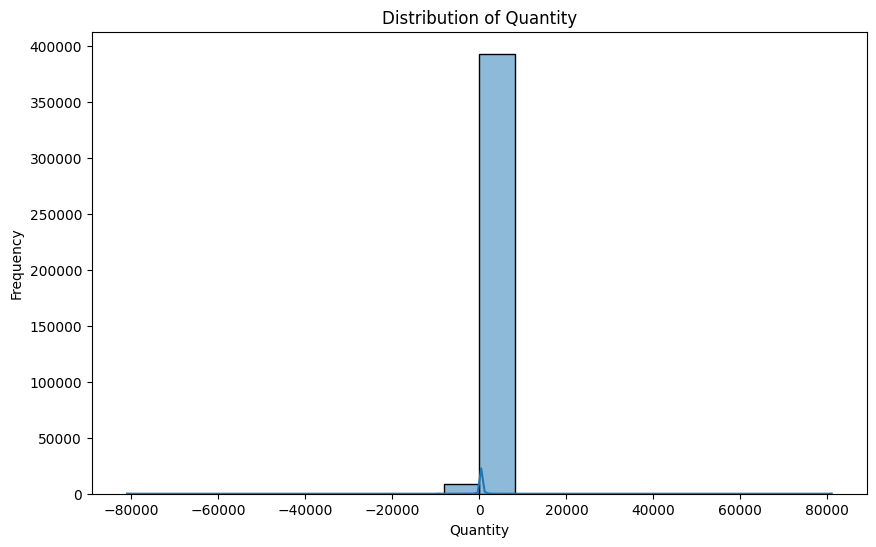

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=20, kde=True)
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

In [ ]:
quantity_below_zero = df[df['Quantity'] < 0]
quantity_above_zero = df[df['Quantity'] > 0]
total_transactions = len(df)

percent_below_zero = (len(quantity_below_zero) / total_transactions) * 100    # Calculating percentages
percent_above_zero = (len(quantity_above_zero) / total_transactions) * 100

print(f"Percentage of Quantity values below 0: {percent_below_zero:.2f}%")
print(f"Percentage of Quantity values above 0: {percent_above_zero:.2f}%")

Percentage of Quantity values below 0: 2.21%
Percentage of Quantity values above 0: 97.79%


**Returns vs. Sales**
* 2.21% of transactions involve returns, while 97.79% are sales. This highlights the importance of managing returns effectively to maintain profitability.

**Outliers Corrections**

In [ ]:
df['Quantity'] = df['Quantity'].clip(lower=0, upper=df['Quantity'].quantile(0.95))  # Clipping to 95th percentile
df['UnitPrice'] = df['UnitPrice'].clip(lower=0, upper=df['UnitPrice'].quantile(0.95))  # Clipping to 95th percentile

### **Univariate Analysis**

**Count of Country**

In [ ]:
df['Country'].value_counts()

Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [ ]:
percentage_distribution = round((df['Country'].value_counts() / len(df)) * 100,2)
print("Percentage distribution of orders based on each country:")
print(percentage_distribution)

Percentage distribution of orders based on each country:
Country
United Kingdom          88.83
Germany                  2.36
France                   2.11
EIRE                     1.86
Spain                    0.63
Netherlands              0.59
Belgium                  0.52
Switzerland              0.47
Portugal                 0.37
Australia                0.31
Norway                   0.27
Italy                    0.20
Channel Islands          0.19
Finland                  0.17
Cyprus                   0.15
Sweden                   0.11
Austria                  0.10
Denmark                  0.10
Japan                    0.09
Poland                   0.08
USA                      0.07
Israel                   0.06
Unspecified              0.06
Singapore                0.06
Iceland                  0.05
Canada                   0.04
Greece                   0.04
Malta                    0.03
United Arab Emirates     0.02
European Community       0.02
RSA                      0.01
Leban

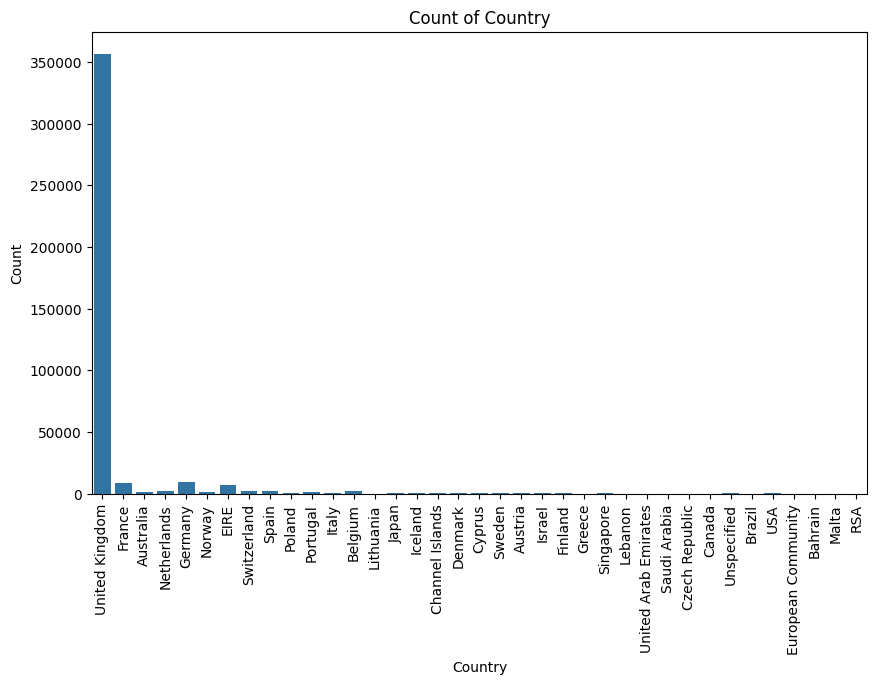

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=df)
plt.title("Count of Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


* United Kingdom: Dominates the orders with approximately 88.83% of the total orders.
* Germany, France, EIRE, Spain, Netherlands, Belgium, Switzerland, Portugal, Australia, Norway: These countries represent smaller but significant percentages, ranging from 0.27% to 2.36%.

### **Distribution of Quantity**

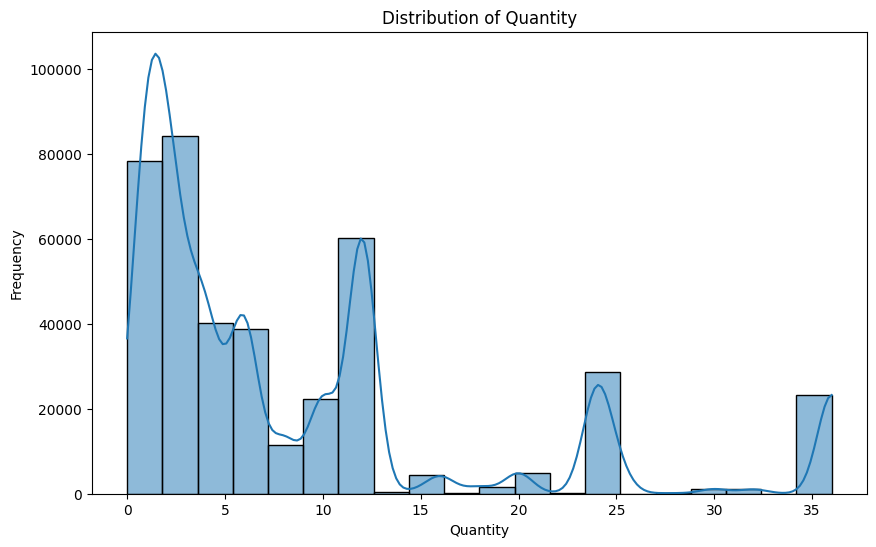

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=20, kde=True)
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

* Most of the values in the dataset are relatively small or close to the minimum value. It suggests that there are many transactions with low quantities of products purchased.

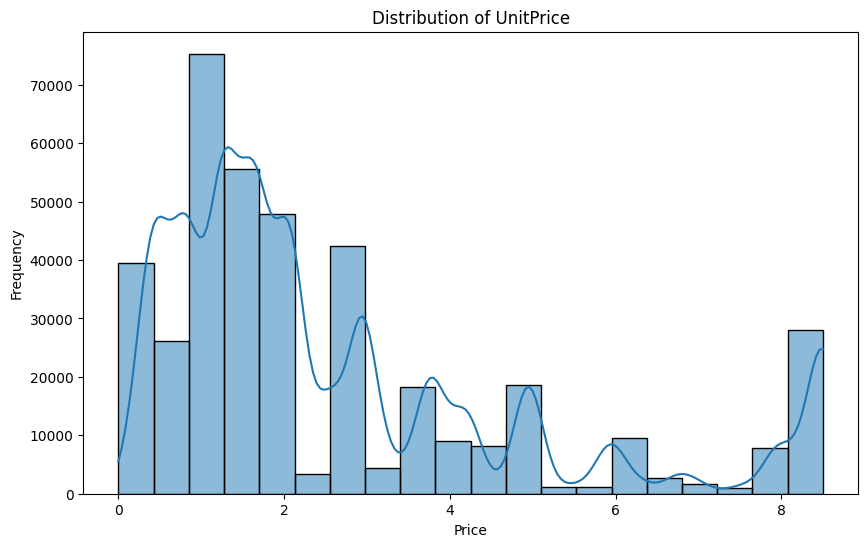

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], bins=20, kde=True)
plt.title("Distribution of UnitPrice")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

* This suggests that there are many products with low prices

### **Bivariate Analysis**

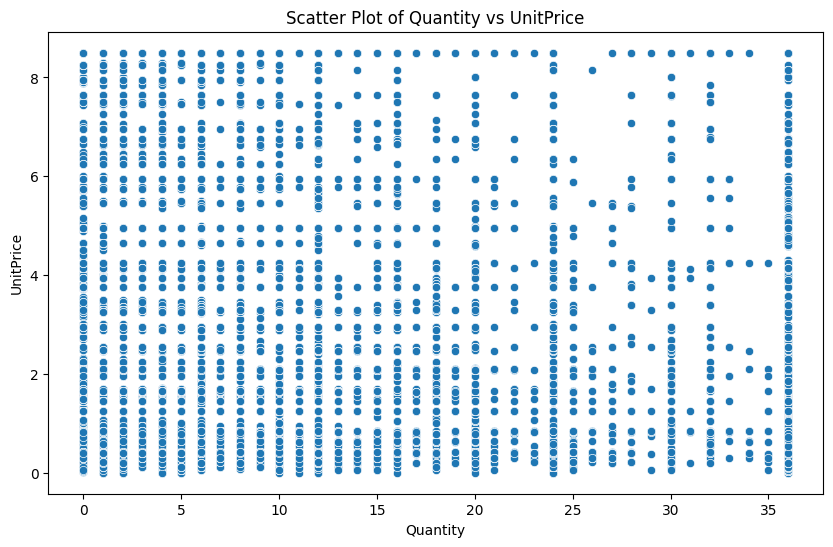

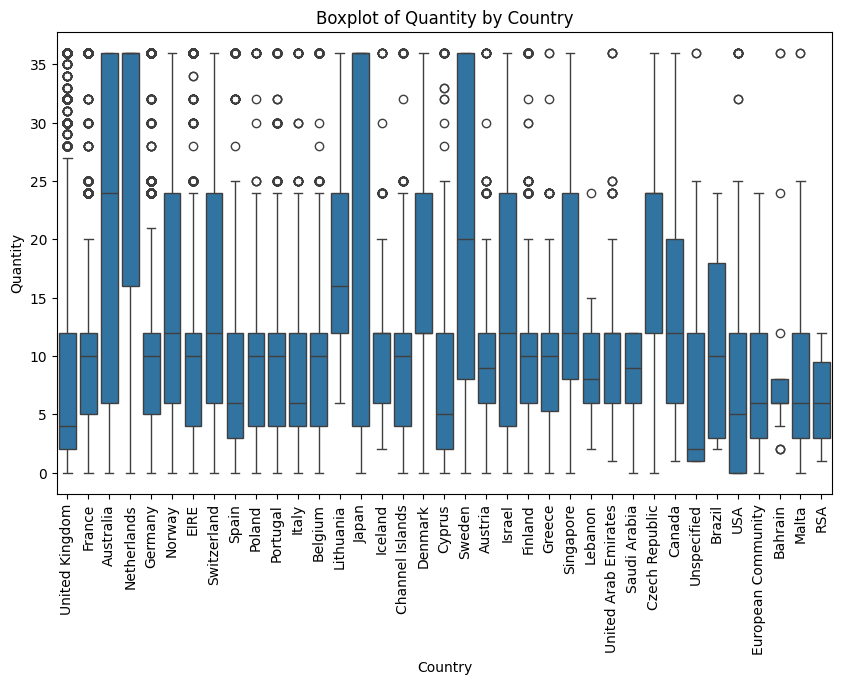

In [ ]:
plt.figure(figsize=(10, 6))    # Relationship between two numerical variables
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title("Scatter Plot of Quantity vs UnitPrice")
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.show()

plt.figure(figsize=(10, 6))    # Relationship between numerical and categorical variables
sns.boxplot(x='Country', y='Quantity', data=df)
plt.title("Boxplot of Quantity by Country")
plt.xlabel("Country")
plt.ylabel("Quantity")
plt.xticks(rotation=90)
plt.show()



### **Multivariate Analysis**

**Heatmap**

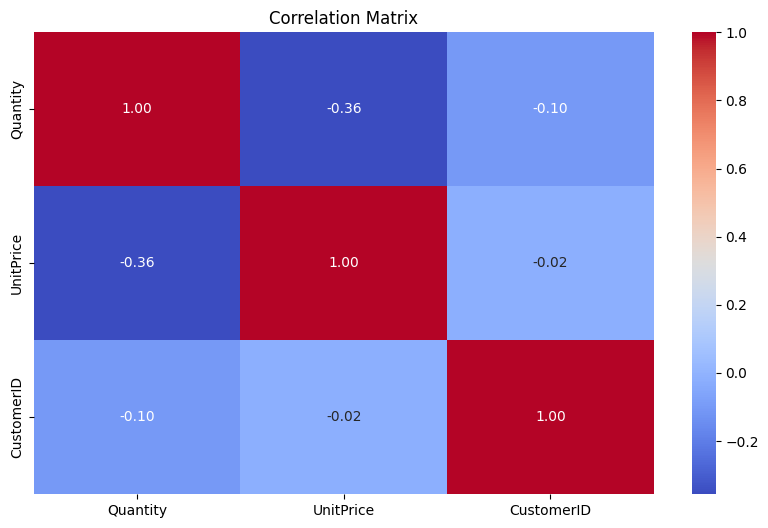

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



* The correlation coefficient of -0.36 suggests a moderate negative correlation between the two variables.
* This means that as the quantity of items purchased increases, the unit price tends to decrease, and vice versa.

**Pairplot**

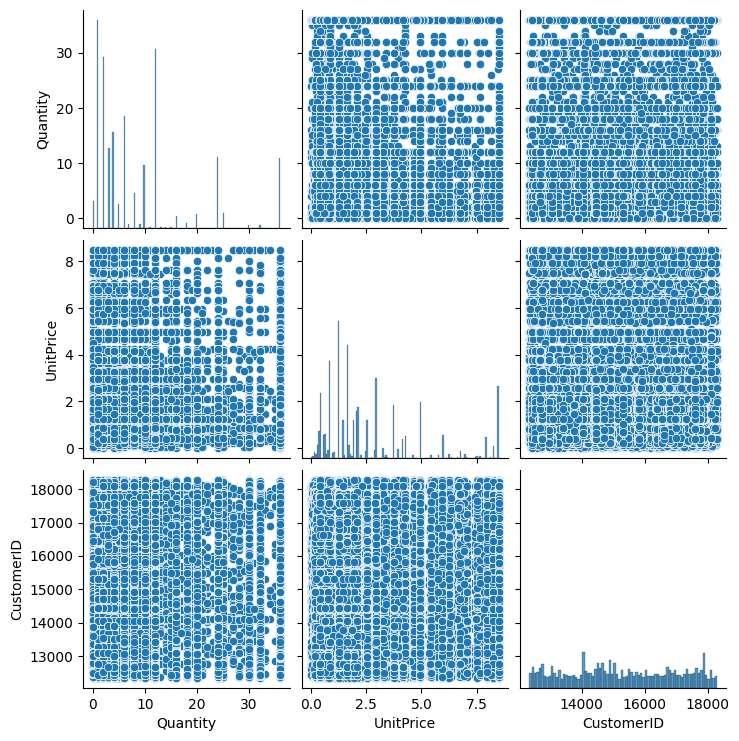

In [ ]:
sns.pairplot(df[['Quantity', 'UnitPrice', 'CustomerID']])
plt.show()

### **Feature Engineering**

**Recency**

In [ ]:
max_date = df['InvoiceDate'].max()
df['Recency'] = (max_date - df['InvoiceDate']).dt.days
recency_grouped = df.groupby('CustomerID')['Recency'].min().reset_index()
recency_grouped.head(5)

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


**Frequency**

In [ ]:
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

In [ ]:
frequency_df

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


**Monetary**

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monetary_df = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,37.44
1,12347.0,4006.81
2,12348.0,699.86
3,12349.0,1389.15
4,12350.0,302.90


In [ ]:
rfm_df = pd.merge(df.groupby('CustomerID')['Recency'].min(), frequency_df, on='CustomerID')    # Merging RFM metrics into a single dataframe
rfm_df = pd.merge(rfm_df, monetary_df, on='CustomerID')

print(rfm_df.head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0      325          2     37.44
1     12347.0        1          7   4006.81
2     12348.0       74          4    699.86
3     12349.0       18          1   1389.15
4     12350.0      309          1    302.90


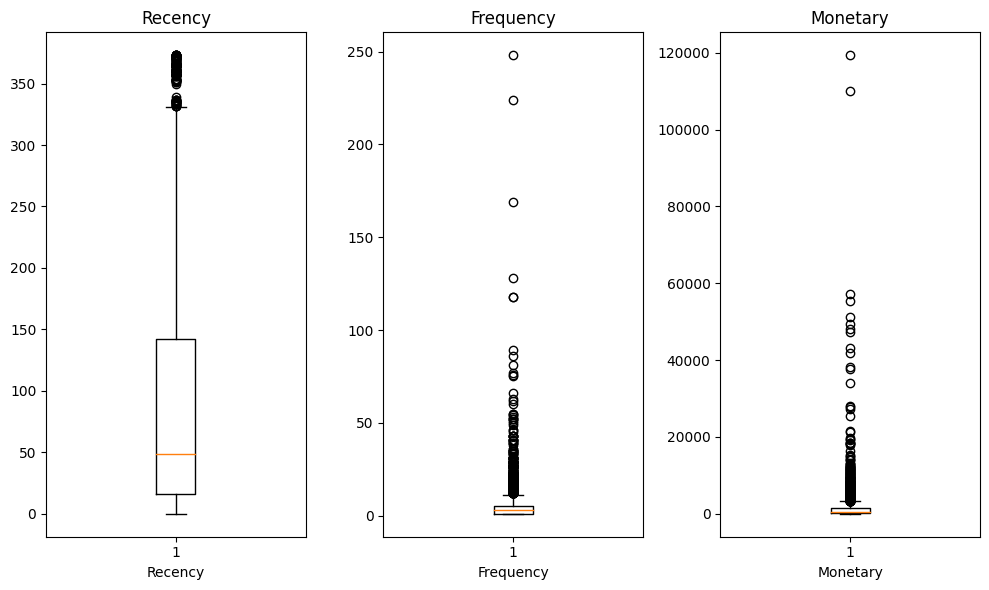

In [ ]:
plt.figure(figsize=(10, 6)) # boxplot for Recency
plt.subplot(1, 3, 1)
plt.boxplot(rfm_df['Recency'])
plt.title('Recency')
plt.xlabel('Recency')

plt.subplot(1, 3, 2)  # boxplot for Frequency
plt.boxplot(rfm_df['Frequency'])
plt.title('Frequency')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)  # boxplot for Monetary
plt.boxplot(rfm_df['Monetary'])
plt.title('Monetary')
plt.xlabel('Monetary')

plt.tight_layout()

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler #RFM Modeling
scaler = StandardScaler()
scaled = scaler.fit_transform(rfm_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

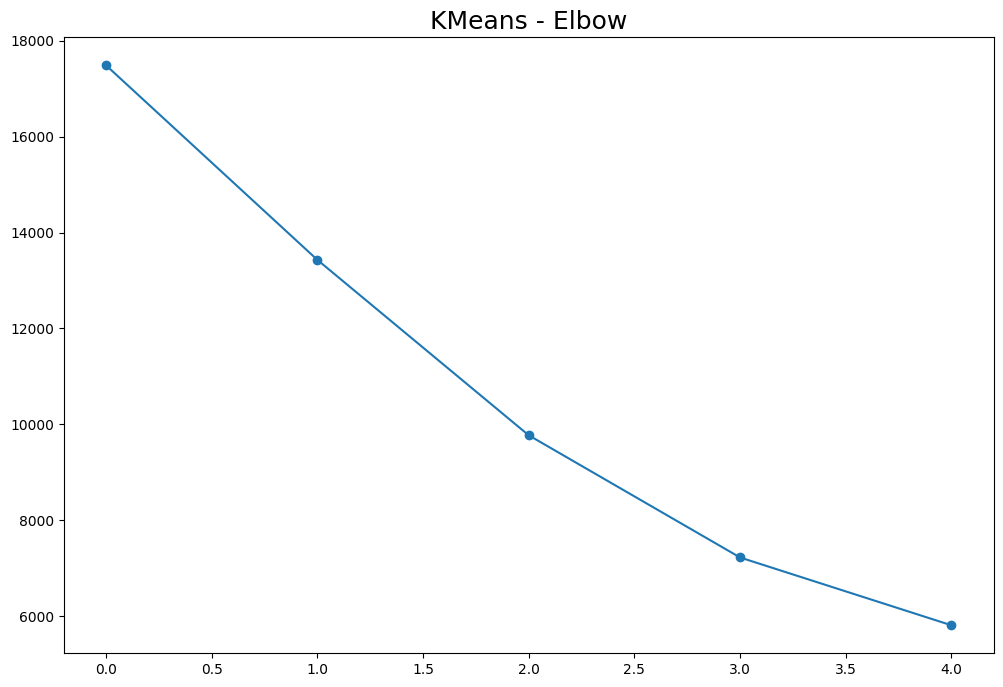

In [ ]:
inertia = []

from sklearn.cluster import KMeans
for i in np.arange(1,6):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (12,8))
plt.plot(inertia, marker = "o")
plt.title("KMeans - Elbow", fontsize = 18);

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(scaled)
rfm_df["Cluster_No"] = (kmeans.labels_ + 1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,Cluster_No
0,12346.0,325,2,37.44,3
1,12347.0,1,7,4006.81,1
2,12348.0,74,4,699.86,1
3,12349.0,18,1,1389.15,1
4,12350.0,309,1,302.90,3


In [ ]:
group=rfm_df.groupby(["Cluster_No"])[["Recency", "Frequency", "Monetary"]].mean()

group

,Recency,Frequency,Monetary
Cluster_No,,,
1,42.815632,5.676014,1657.601063
2,5.583333,86.125000,39180.788333
3,256.828542,1.772074,372.812619
4,44.766784,5.232038,1333.271303


In [ ]:
def func (row):
    if row['Cluster_No'] == 4:
        return 'High Potential'
    elif row['Cluster_No']== 2:
        return 'VIP Customers'
    elif row['Cluster_No']==1:
        return 'Promising Customers'
    else:
        return 'Inactive Customers'

In [ ]:
rfm_df['Condition']=rfm_df.apply(func,axis=1)

In [ ]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,Cluster_No,Condition
0,12346.0,325,2,37.44,3,Inactive Customers
1,12347.0,1,7,4006.81,1,Promising Customers
2,12348.0,74,4,699.86,1,Promising Customers
3,12349.0,18,1,1389.15,1,Promising Customers
4,12350.0,309,1,302.90,3,Inactive Customers
...,...,...,...,...,...,...
4367,18280.0,277,1,177.70,3,Inactive Customers
4368,18281.0,180,1,63.92,4,High Potential
4369,18282.0,7,3,157.57,4,High Potential
4370,18283.0,3,16,2036.63,4,High Potential


In [ ]:
rfm_df['Condition'].value_counts()

Condition
High Potential         1698
Promising Customers    1676
Inactive Customers      974
VIP Customers            24
Name: count, dtype: int64

In [ ]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,Cluster_No,Condition
0,12346.0,325,2,37.44,3,Inactive Customers
1,12347.0,1,7,4006.81,1,Promising Customers
2,12348.0,74,4,699.86,1,Promising Customers
3,12349.0,18,1,1389.15,1,Promising Customers
4,12350.0,309,1,302.90,3,Inactive Customers
...,...,...,...,...,...,...
4367,18280.0,277,1,177.70,3,Inactive Customers
4368,18281.0,180,1,63.92,4,High Potential
4369,18282.0,7,3,157.57,4,High Potential
4370,18283.0,3,16,2036.63,4,High Potential


<Axes: xlabel='Condition'>

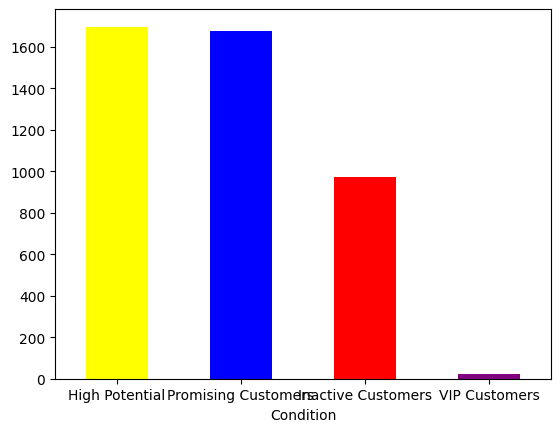

In [ ]:
result=rfm_df['Condition'].value_counts()
result.plot(kind='bar',rot=0, color=['Yellow','Blue','Red','Purple'])

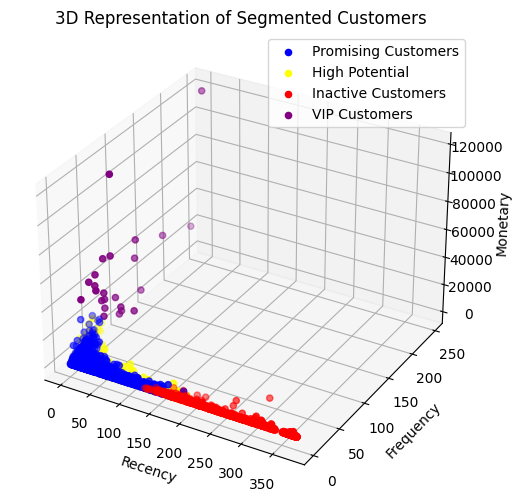

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = {'Promising Customers': 'blue',
          'High Potential': 'yellow',
          'Inactive Customers': 'red',
          'VIP Customers': 'purple'}

for segment, color in colors.items():
    segment_data = rfm_df[rfm_df['Condition'] == segment]
    ax.scatter(segment_data['Recency'], segment_data['Frequency'], segment_data['Monetary'], c=color, label=segment)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Representation of Segmented Customers')

ax.legend()

plt.show()

**Insights**

---
**Cluster 2: VIP Customers**
* This cluster has very low recency, indicating very recent purchases.
* Both frequency and monetary values are significantly higher compared to other clusters, suggesting high-value customers.

**Cluster 4: High Potential**
* This cluster has relatively low recency, indicating recent purchases.
* The frequency and monetary values are moderate, suggesting consistent but not high spending behavior.

**Cluster 1: Promising Customers**
* This cluster has moderate recency, indicating somewhat recent purchases.
* Frequency and monetary values are also moderate, suggesting potential for higher engagement and spending in the future.

**Cluster 3: Inactive Customers**
* This cluster has high recency, indicating less recent purchases.
* Both frequency and monetary values are relatively low, suggesting inactive or low-engagement customers.

**Recommendations**

---
**High Potential Customers (1698)**
* Implement targeted marketing campaigns to nurture and retain these customers.
Offer personalized discounts or promotions to encourage repeat purchases and loyalty.
* Provide excellent customer service to enhance their shopping experience and strengthen their relationship with the brand.

**Promising Customers (1678):**
* Segment these customers based on their preferences and purchase history to tailor marketing efforts.
* Offer incentives such as loyalty programs, referral rewards, or exclusive deals to encourage repeat purchases.
* Collect feedback to understand their needs and preferences better and adjust strategies accordingly.

**Inactive Customers (973):**
* Re-engage inactive customers through personalized email campaigns, offering discounts or incentives to return.
* Conduct surveys or reach out to understand the reasons for their inactivity and address any concerns or issues.
* Implement strategies to reactivate dormant accounts, such as reminder emails for abandoned carts or exclusive offers for returning customers.

**VIP Customers (23):**
* Provide VIP customers with exclusive benefits, such as early access to new products, VIP-only events, or dedicated customer support.
* Personalize communications and offerings based on their preferences and purchase history.
* Regularly engage with VIP customers to show appreciation for their loyalty and ensure their continued satisfaction.


###**Calculating the average days between purchases, preferred shopping days, and peak shopping hours for each customer**




In [ ]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,Cluster_No,Condition
0,12346.0,325,2,37.44,3,Inactive Customers
1,12347.0,1,7,4006.81,1,Promising Customers
2,12348.0,74,4,699.86,1,Promising Customers
3,12349.0,18,1,1389.15,1,Promising Customers
4,12350.0,309,1,302.90,3,Inactive Customers
...,...,...,...,...,...,...
4367,18280.0,277,1,177.70,3,Inactive Customers
4368,18281.0,180,1,63.92,4,High Potential
4369,18282.0,7,3,157.57,4,High Potential
4370,18283.0,3,16,2036.63,4,High Potential


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**Calculating the Distribution Average days between Purchases**

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df_sorted = df.sort_values(by=['CustomerID', 'InvoiceDate'])

df_sorted['TimeDifference'] = df_sorted.groupby('CustomerID')['InvoiceDate'].diff()

average_days_between_purchases = df_sorted.groupby('CustomerID')['TimeDifference'].mean().dt.days

print("Average Days Between Purchases:")
print(average_days_between_purchases)

Average Days Between Purchases:
CustomerID
12346.0    0.0
12347.0    2.0
12348.0    9.0
12349.0    0.0
12350.0    0.0
          ... 
18280.0    0.0
18281.0    0.0
18282.0    9.0
18283.0    0.0
18287.0    2.0
Name: TimeDifference, Length: 4372, dtype: float64


<ipython-input-176-3c5d3c8c3400>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(average_days_bins, palette='coolwarm')


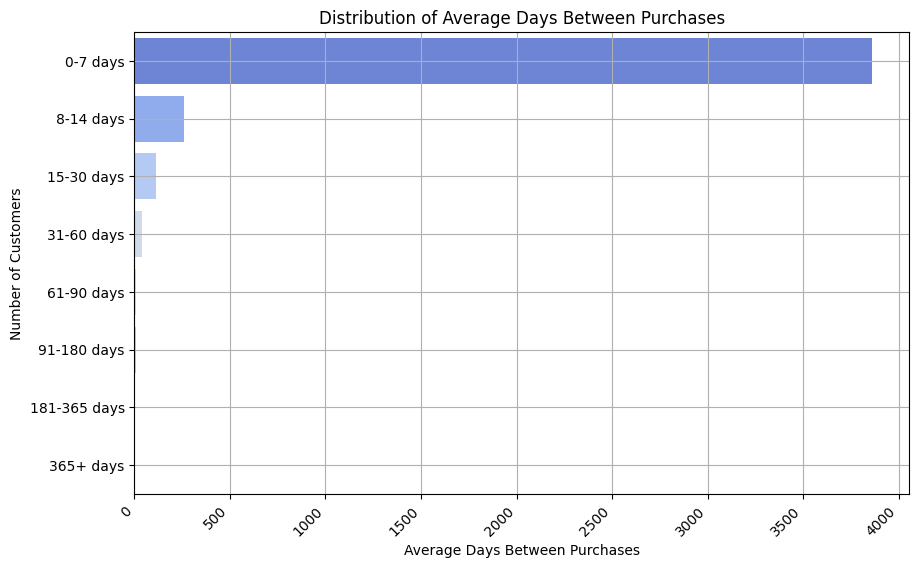

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df_sorted = df.sort_values(by=['CustomerID', 'InvoiceDate'])

df_sorted['TimeDifference'] = df_sorted.groupby('CustomerID')['InvoiceDate'].diff()

average_days_between_purchases = df_sorted.groupby('CustomerID')['TimeDifference'].mean().dt.days


bins = [0, 7, 14, 30, 60, 90, 180, 365, float('inf')]
bin_labels = ['0-7 days', '8-14 days', '15-30 days', '31-60 days', '61-90 days', '91-180 days', '181-365 days', '365+ days']

average_days_bins = pd.cut(average_days_between_purchases, bins=bins, labels=bin_labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(average_days_bins, palette='coolwarm')
plt.title('Distribution of Average Days Between Purchases')
plt.xlabel('Average Days Between Purchases')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [ ]:
bin_value_counts = average_days_bins.value_counts().sort_index()

print("Value Counts Based on Bins:")
print(bin_value_counts)

Value Counts Based on Bins:
TimeDifference
0-7 days        3863
8-14 days        258
15-30 days       111
31-60 days        39
61-90 days         8
91-180 days       10
181-365 days       4
365+ days          0
Name: count, dtype: int64


**Insights**

---
**High Frequency Purchasers (0-7 days)**
* The majority of customers fall into this category, with 3863 customers making purchases within 0-7 days on average.
* These customers are frequent purchasers, demonstrating consistent buying behavior and potentially high engagement with the brand or product offerings.

**Moderate Frequency Purchasers (8-14 days and 15-30 days)**
* There are fewer customers in these bins compared to the 0-7 days category, indicating a lower frequency of purchases.
* Customers in the 8-14 days and 15-30 days bins may have slightly longer intervals between purchases but still maintain regular buying habits.

**Low to Moderate Frequency Purchasers (31-60 days, 61-90 days, and 91-180 days)**
* The number of customers decreases significantly in these bins, suggesting less frequent purchasing behavior.
* Customers in these categories may have longer intervals between purchases, indicating lower engagement or less frequent need for the products offered.

**Infrequent Purchasers (181-365 days and 365+ days)**
* The number of customers in these bins is relatively small, indicating infrequent purchasing behavior.
* Customers in these categories may make purchases sporadically or have minimal engagement with the brand or product offerings.


**Recommendations**

---

* Businesses should focus on retaining and engaging high-frequency purchasers while implementing strategies to re-engage and retain customers with longer intervals between purchases.
* Tailored marketing campaigns, loyalty programs, and personalized incentives can be effective in encouraging repeat purchases and increasing customer retention across different purchasing frequency segments.

**Distribution of Preferred Shopping Days**

In [ ]:
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

preferred_shopping_days = round(df['Weekday'].value_counts(normalize=True) * 100,2)

print("Preferred Shopping Days:")
print(preferred_shopping_days)

Preferred Shopping Days:
Weekday
Thursday     20.31
Wednesday    17.37
Tuesday      16.78
Monday       16.36
Sunday       15.36
Friday       13.82
Name: proportion, dtype: float64


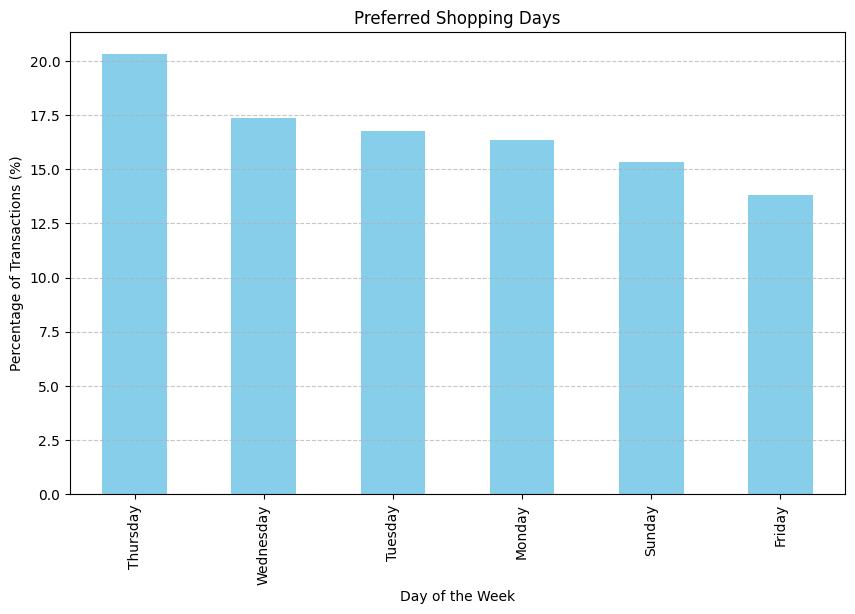

In [ ]:
plt.figure(figsize=(10, 6)) # Plotting preferred shopping days
preferred_shopping_days.plot(kind='bar', color='skyblue')
plt.title('Preferred Shopping Days')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Transactions (%)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Preferred Shopping Days**

---


* Thursday appears to be the most preferred shopping day, with approximately 20.31% of purchases occurring on that day.
* Wednesday, Tuesday, and Monday follow closely behind, with proportions ranging from 16.36% to 17.37%.
* Sunday and Friday have slightly lower proportions of purchases, accounting for around 15.36% and 13.82% respectively.
* These insights suggest that mid-week days (Thursday, Wednesday, Tuesday, and Monday) are more popular for shopping compared to weekends (Sunday) or the start of the weekend (Friday).

**Distribution of Shopping Hours**

In [ ]:
peak_shopping_hours = df['Hour'].value_counts(normalize=True) * 100

print("\nPeak Shopping Hours:")
print(peak_shopping_hours)


Peak Shopping Hours:
Hour
12    17.981146
13    15.948795
14    13.494388
11    12.331799
15    11.364678
10     9.642583
16     6.129919
9      5.589088
17     3.387416
8      2.188474
19     0.852332
18     0.772901
20     0.210904
7      0.095368
6      0.010209
Name: proportion, dtype: float64


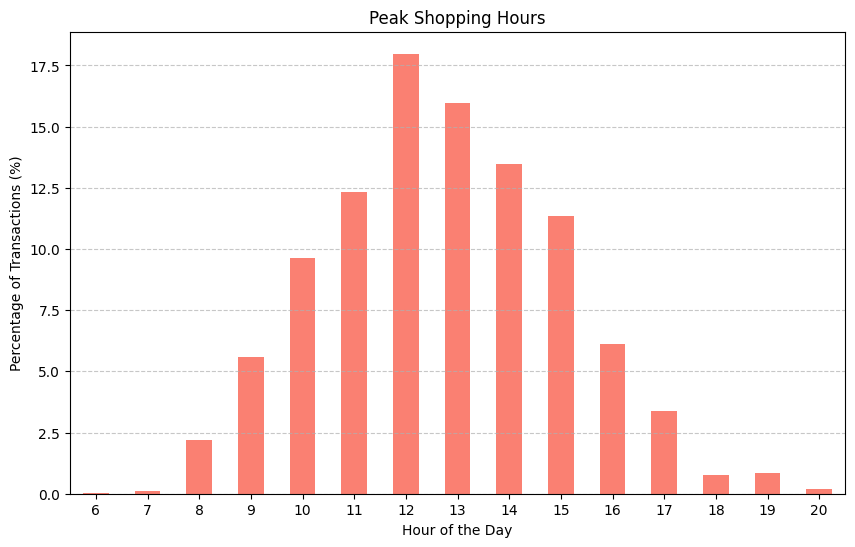

In [ ]:
plt.figure(figsize=(10, 6)) # Plotting preferred Shopping Hours
peak_shopping_hours.sort_index().plot(kind='bar', color='salmon')
plt.title('Peak Shopping Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Transactions (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Peak Shopping Hours**

---


* The peak shopping hours seem to be around midday, with 12:00 PM (noon) being the peak hour, accounting for approximately 17.98% of purchases.
* The hours from 11:00 AM to 3:00 PM (11:00 to 15:00) appear to be the busiest, with proportions ranging from 11.36% to 17.98%.
* This suggests that customers tend to shop more during the daytime hours, possibly during lunch breaks or after completing morning tasks.
* Shopping activity gradually decreases in the afternoon and evening hours, with fewer purchases made during late evening and early morning hours.

**Recommendations**

---

* Promotions and Special Offers: Schedule promotions, discounts, and special offers to coincide with the peak shopping hours, especially during midday hours when customer activity is highest. Consider offering time-limited deals or lunchtime specials to attract shoppers during these busy periods.
* Targeted Marketing Campaigns: Tailor marketing campaigns and advertisements to target customers on the preferred shopping days, such as Thursday, Wednesday, Tuesday, and Monday. Allocate marketing budgets accordingly to maximize the reach and impact of campaigns during these days.
* Enhanced Customer Service: Allocate additional staff and resources during peak shopping hours to ensure excellent customer service and assistance. Provide support through multiple channels, including in-store assistance, online chat support, and responsive customer service hotlines, to address customer inquiries and enhance the shopping experience.
* Inventory Management: Optimize inventory management practices to ensure adequate stock levels during peak shopping hours and preferred shopping days. Monitor sales trends and adjust inventory levels accordingly to prevent stockouts and meet customer demand effectively.
* Convenient Shopping Experience: Offer convenience-driven services such as click-and-collect, curbside pickup, and express checkout options to streamline the shopping experience for busy customers. Ensure that online platforms are user-friendly and optimized for mobile devices to facilitate seamless shopping on-the-go.
* Customer Engagement: Engage customers through personalized communications, loyalty programs, and targeted offers based on their shopping preferences and behavior. Leverage customer data to segment shoppers and deliver relevant content that resonates with their interests and shopping habits.
* Continuous Monitoring and Adaptation: Regularly monitor customer behavior, sales patterns, and market trends to identify emerging opportunities and challenges. Stay agile and adaptable to adjust strategies in response to changing customer preferences and market dynamics.

### **Categorizing CustomerID based on activity levels.**

In [ ]:
def categorize_activity_level(frequency):  # Defining function to categorize activity levels
    if frequency <= rfm_df['Frequency'].quantile(0.25):
        return 'Inactive'
    elif frequency <= rfm_df['Frequency'].quantile(0.75):
        return 'Moderate'
    else:
        return 'Active'

rfm_df['Activity_Level'] = rfm_df['Frequency'].apply(categorize_activity_level)

print(rfm_df.head())

   CustomerID  Recency  Frequency  Monetary  Cluster_No            Condition  \
0     12346.0 325 days          2     37.44           3   Inactive Customers   
1     12347.0   1 days          7   4006.81           1  Promising Customers   
2     12348.0  74 days          4    699.86           1  Promising Customers   
3     12349.0  18 days          1   1389.15           1  Promising Customers   
4     12350.0 309 days          1    302.90           3   Inactive Customers   

   AvgDaysBetweenPurchases Activity_Level  
0                      NaN       Moderate  
1                      NaN         Active  
2                      NaN       Moderate  
3                      NaN       Inactive  
4                      NaN       Inactive  


In [ ]:
inactive_customers = rfm_df[rfm_df['Activity_Level'] == 'Inactive'] # Segmenting the dataset based on activity level
moderate_customers = rfm_df[rfm_df['Activity_Level'] == 'Moderate']
active_customers = rfm_df[rfm_df['Activity_Level'] == 'Active']

print("Number of Inactive Customers:", len(inactive_customers))
print("Number of Moderate Customers:", len(moderate_customers))
print("Number of Active Customers:", len(active_customers))

Number of Inactive Customers: 1313
Number of Moderate Customers: 1972
Number of Active Customers: 1087


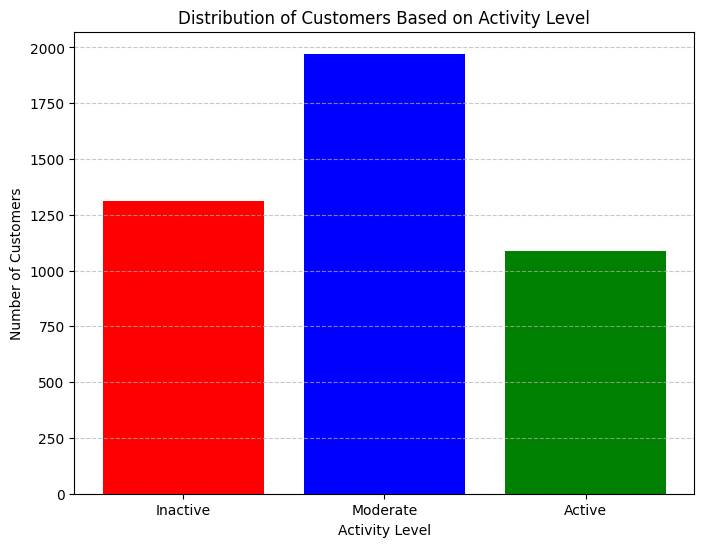

In [ ]:
activity_levels = ['Inactive', 'Moderate', 'Active']
counts = [len(inactive_customers), len(moderate_customers), len(active_customers)]

plt.figure(figsize=(8, 6))
plt.bar(activity_levels, counts, color=['red', 'blue', 'green'])
plt.title('Distribution of Customers Based on Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insights**

---
**Inactive Customers (1313)**
* These customers make the fewest purchases and have the lowest engagement with the business.
* They may require targeted re-engagement strategies to reactivate their interest and encourage repeat purchases.

**Moderate Customers (1972)**
* This segment represents customers with moderate purchase frequency and engagement.
* While they are not as active as the Active segment, they still contribute to revenue and may have potential for further engagement and retention.

**Active Customers (1087)**
* These customers are highly engaged and make frequent purchases, contributing significantly to the business's revenue.
* They represent valuable segments that may benefit from personalized loyalty rewards, exclusive offers, and VIP treatment to maintain their loyalty and encourage continued engagement.


**Recommendations**

---
**Reactivation Campaigns**
* Target Inactive Customers with reactivation campaigns, offering incentives, special promotions, or personalized recommendations to encourage them to return and make purchases.

**Engagement Strategies**
* Implement engagement strategies for Moderate Customers, such as targeted email campaigns, personalized product recommendations, and loyalty programs, to increase their purchase frequency and overall engagement.

**Retention Programs**
* Develop retention programs tailored to Active Customers, offering VIP benefits, early access to new products, and exclusive discounts to reward their loyalty and encourage repeat purchases.

**Customer Segmentation**
* Continuously analyze customer behavior and segment them based on activity levels to tailor marketing efforts and communication strategies effectively.

**Feedback and Surveys**
* Collect feedback and conduct surveys to understand the preferences, needs, and pain points of customers across different activity levels, informing strategic decision-making and continuous improvement initiatives.

**Data-Driven Insights**
* Utilize data analytics and customer insights to identify trends, patterns, and opportunities within each segment, enabling data-driven decision-making and targeted marketing strategies.
